In [3]:
from tensorflow.contrib.keras import models
from tensorflow.contrib.keras import layers
from tensorflow.contrib import keras
import pandas
dataset=pandas.read_csv('dataset.csv')
setx=dataset.values[:,0]
sety=dataset.values[:,1]

model = models.Sequential([layers.Dense(1, input_shape=(1,))])
# Use Adam optimizier and Mean Squared Error (MSE) as loss function
model.compile(optimizer=keras.optimizers.Adamax(0.1), loss='mse') 
print model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2.0
Trainable params: 2
Non-trainable params: 0.0
_________________________________________________________________
None


In [4]:
traininglog=model.fit(setx, sety, epochs=100, batch_size=1,verbose=0)
traininglog.history['loss'][::10] # print every 10 epochs

[31.88231716528535,
 0.02045083850098308,
 0.009396455676323967,
 0.0034374483724604944,
 0.0010256565983581822,
 0.0002667229771759594,
 3.7077795241202693e-05,
 3.619184462877456e-06,
 2.1000409162752475e-07,
 5.915615020057885e-09]

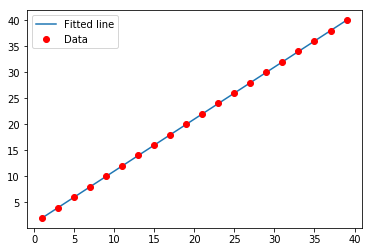

In [5]:
trained_m = model.get_weights()[0][0][0]
trained_c = model.get_weights()[1][0] 
import matplotlib.pyplot as plt
plt.plot(setx, trained_m * setx + trained_c, label='Fitted line')
plt.plot(setx, sety, 'ro', label='Data')
plt.legend()
plt.show()